In [1]:
from utils import (
    get_areas, 
    get_specimen_ids, 
    get_trials,
    get_units_count,
    get_summary_df,
    load_memmap,
    load_index
)

from neural_maps import (
    sim_corrected_source_pair, 
    pls_corrected_single_source_to_B,
    sim_corrected_model_to_B,
    pls_corrected_model_to_B
)

from mapping import (
    compute_all_layer_scores,
    compute_area_scores
)

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_cka_comparison

import itertools
import pandas as pd
import json
import os

IMAGE_FOLDER = "../Preproc2/images/"


# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

In [2]:
index_model_random = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="random",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-random-matrices",
    return_in_memory=False
)

/home/giovanni/Desktop/mice-representation/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/giovanni/Desktop/mice-representation/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
index_model_inet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    weights="imagenet",
    device="cpu",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-matrices-inet",
    return_in_memory=False
)

# Loading the index file with paths to neural data

In [4]:
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

In [5]:
layer_scores_random_cka, median_scores_random_cka = compute_area_scores(index_model_random, index_df, sim_metric='CKA')
layer_scores_inet_cka, median_scores_inet_cka = compute_area_scores(index_model_inet, index_df, sim_metric='CKA')

MemoryError: Unable to allocate 279. GiB for an array with shape (193600, 193600) and data type float64

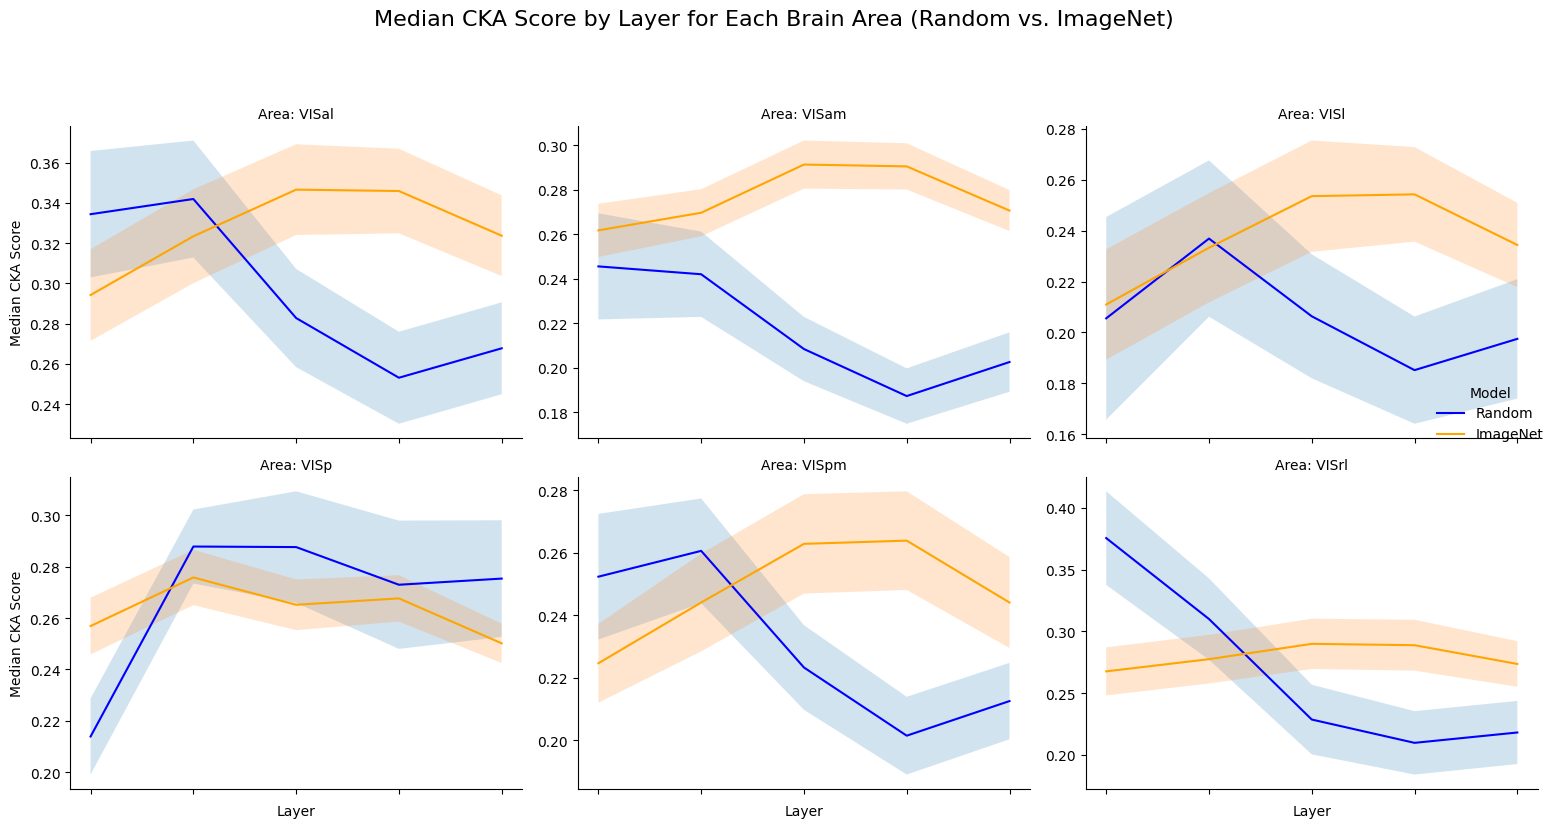

In [6]:
plot_cka_comparison(median_scores_random_cka, median_scores_inet_cka, metric_name='CKA')

In [7]:
# layer_scores_random_rsa, median_scores_random_rsa = compute_area_scores(index_model_random, index_df, sim_metric='RSA')
layer_scores_inet_rsa, median_scores_inet_rsa = compute_area_scores(index_model_inet, index_df, sim_metric='RSA')
plot_cka_comparison(median_scores_random_rsa, median_scores_inet_rsa, metric_name='RSA')

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2929
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3138


KeyboardInterrupt: 

In [ ]:
layer_scores_random_pls, median_scores_random_pls = compute_area_scores(index_model_random, index_df, sim_metric='PLS')
layer_scores_inet_pls, median_scores_inet_pls = compute_area_scores(index_model_inet, index_df, sim_metric='PLS')
plot_cka_comparison(median_scores_random_pls, median_scores_inet_pls, metric_name='PLS')